## Hierarchical Gradient Bandit (Oracle: Random Forest)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm, sem, t
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle

In [ ]:
class Student_type1():
    def __init__(self):
        f1 = truncnorm(a=(0-75)/10, b=(100-75)/10, loc=75, scale=10).rvs(size=1).astype(int)[0]
        f2 = truncnorm(a=(0-50)/10, b=(100-50)/10, loc=50, scale=10).rvs(size=1).astype(int)[0]
        f3 = truncnorm(a=(0-25)/10, b=(100-25)/10, loc=25, scale=10).rvs(size=1).astype(int)[0]
        self.features = [f1,f2,f3]

    def get_features(self):
        return self.features

    def get_optimal_reward(self):
        return 0.5*(truncnorm(a=(0-60)/10, b=(100-60)/10, loc=60, scale=10).rvs(size=1).astype(int)[0])+50

    def get_reward(self,action,selected_type):
        type_error = 0
        if(selected_type != 0):
            type_error = 1
        if action == 0:
            score = truncnorm(a=(0-40)/40, b=(100-40)/40, loc=40, scale=40).rvs(size=1).astype(int)[0]
        elif action == 1:
            score = truncnorm(a=(0-60)/10, b=(100-60)/10, loc=60, scale=10).rvs(size=1).astype(int)[0]
        else:
            score = truncnorm(a=(0-50)/20, b=(100-50)/20, loc=50, scale=20).rvs(size=1).astype(int)[0]

        return 0.5*score + (1-type_error)*50

class Student_type2():
    def __init__(self):
        f1 = truncnorm(a=(0-25)/10, b=(100-25)/10, loc=25, scale=10).rvs(size=1).astype(int)[0]
        f2 = truncnorm(a=(0-50)/10, b=(100-50)/10, loc=50, scale=10).rvs(size=1).astype(int)[0]
        f3 = truncnorm(a=(0-25)/10, b=(100-25)/10, loc=25, scale=10).rvs(size=1).astype(int)[0]
        self.features = [f1,f2,f3]

    def get_features(self):
        return self.features

    def get_optimal_reward(self):
        return 0.5*(truncnorm(a=(0-70)/50, b=(100-70)/50, loc=70, scale=50).rvs(size=1).astype(int)[0])+50

    def get_reward(self,action,selected_type):
        type_error = 0
        if(selected_type != 1):
            type_error = 1
        if action == 0:
            score = truncnorm(a=(0-70)/50, b=(100-70)/50, loc=70, scale=50).rvs(size=1).astype(int)[0]
        elif action == 1:
            score = truncnorm(a=(0-50)/30, b=(100-50)/30, loc=50, scale=30).rvs(size=1).astype(int)[0]
        else:
            score = truncnorm(a=(0-60)/20, b=(100-60)/20, loc=60, scale=20).rvs(size=1).astype(int)[0]

        return 0.5*score + (1-type_error)*50

class Student_type3():
    def __init__(self):
        f1 = truncnorm(a=(0-50)/10, b=(100-50)/10, loc=50, scale=10).rvs(size=1).astype(int)[0]
        f2 = truncnorm(a=(0-75)/10, b=(100-75)/10, loc=75, scale=10).rvs(size=1).astype(int)[0]
        f3 = truncnorm(a=(0-75)/10, b=(100-75)/10, loc=75, scale=10).rvs(size=1).astype(int)[0]
        self.features = [f1,f2,f3]

    def get_features(self):
        return self.features

    def get_optimal_reward(self):
        return 0.5*(truncnorm(a=(0-55)/5, b=(100-55)/5, loc=55, scale=5).rvs(size=1).astype(int)[0])+50


    def get_reward(self,action,selected_type):
        type_error = 0
        if(selected_type != 2):
            type_error = 1
        if action == 0:
            score = truncnorm(a=(0-20)/70, b=(100-20)/70, loc=20, scale=70).rvs(size=1).astype(int)[0]
        elif action == 1:
            score = truncnorm(a=(0-50)/10, b=(100-50)/10, loc=50, scale=10).rvs(size=1).astype(int)[0]
        else:
            score = truncnorm(a=(0-55)/5, b=(100-55)/5, loc=55, scale=5).rvs(size=1).astype(int)[0]

        return 0.5*score + (1-type_error)*50


In [ ]:
class Contextual_Gradient_Bandit_Agent:
    def __init__(self, learning_rate, no_arms, no_contexts, epsilon=0.1):
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.H_values = np.zeros((no_contexts, no_arms))
        self.action_probs = np.zeros(no_arms)


    def map_action_probabilities(self, context_id):
        self.action_probs = np.exp(self.H_values[context_id]) / np.sum(np.exp(self.H_values[context_id]))

    def get_action(self, context_id):
        self.map_action_probabilities(context_id)
        if np.random.rand() < self.epsilon:
            return np.random.choice(len(self.action_probs))
        else:
            return np.random.choice(len(self.action_probs), p=self.action_probs)

    def update(self, action, reward, context_id):
        baseline = np.mean(self.H_values[context_id])
        chosen_action_prob = self.action_probs[action]

        for a in range(len(self.H_values[context_id])):
            if a == action:
                self.H_values[context_id][a] += self.learning_rate * (reward - baseline) * (1 - chosen_action_prob)
            else:
                self.H_values[context_id][a] -= self.learning_rate * (reward - baseline) * self.action_probs[a]

In [ ]:
# Environment
class Environment:
    def __init__(self, students):
        self.students = students

    def calc_reward(self, student_id, action, selected_type):   #taghir dadam injaro
        student = self.students[student_id]
        return student.get_reward(action, selected_type)

In [ ]:
# Initialize simulation parameters
no_arms = 3
no_contexts = 3
learning_rate = 0.01
epsilon = 0.1
num_trials = 52
students_per_school = 100
num_schools = 10

# Initialize structures to store mean rewards and cumulative regrets per trial for each school
mean_rewards_per_trial = np.zeros((num_schools, num_trials))
optimal_mean_rewards_per_trial = np.zeros((num_schools, num_trials))
cumulative_regrets_per_trial = np.zeros((num_schools, num_trials))



# Initial Data Collection for Online Learning
X, y = [], []
initial_data_size = 500

for _ in range(initial_data_size):
    student_type = np.random.randint(0, 3)
    student = Student_type1() if student_type == 0 else Student_type2() if student_type == 1 else Student_type3()
    action = np.random.choice(no_arms)
    reward = student.get_reward(action, student_type)
    if(reward>50):
        X.append(student.get_features())
        y.append(student_type)

X, y = shuffle(X, y)
classifier = RandomForestClassifier()
classifier.fit(X, y)


# Generate students and create environments for each school
schools_env = []
for school in range(num_schools):
    students_list = []
    students_type = np.random.randint(0, 3, students_per_school)
    for student in students_type:
        if student == 0:
            students_list.append(Student_type1())
        elif student == 1:
            students_list.append(Student_type2())
        else:
            students_list.append(Student_type3())
    schools_env.append(Environment(students_list))

In [ ]:
# Initialize agents for each school
agents = [Contextual_Gradient_Bandit_Agent(learning_rate, no_arms, no_contexts, epsilon) for _ in range(num_schools)]

# Simulation loop with online learning
for school_id in range(num_schools):
    new_X, new_y = [], []
    for trial in range(num_trials):
        trial_rewards = 0
        optimal_trial_rewards = 0
        #new_X, new_y = [], []

        for student_id in range(students_per_school):
            student = schools_env[school_id].students[student_id]
            predicted_context_id = classifier.predict([student.get_features()])[0]
            action = agents[school_id].get_action(predicted_context_id)
            reward = schools_env[school_id].calc_reward(student_id, action, predicted_context_id)
            optimal_reward = schools_env[school_id].students[student_id].get_optimal_reward()
            agents[school_id].update(action, reward, predicted_context_id)
            trial_rewards += reward
            optimal_trial_rewards +=optimal_reward

            # Collect new data for online learning
            if(reward>50):
                new_X.append(student.get_features())
                new_y.append(predicted_context_id)

        # Online update of the classifier
        if new_X:
            classifier.fit(new_X, new_y)

        # Update rewards and regrets
        mean_reward = trial_rewards / students_per_school
        optimal_mean_reward = optimal_trial_rewards /students_per_school
        mean_rewards_per_trial[school_id, trial] = mean_reward
        optimal_mean_rewards_per_trial[school_id, trial] = optimal_mean_reward
        #cumulative_regrets_per_trial[school_id, trial] = trial * 77.5 - np.sum(mean_rewards_per_trial[school_id, :trial + 1])
        cumulative_regrets_per_trial[school_id, trial] = np.sum(optimal_mean_rewards_per_trial[school_id, :trial + 1]) - np.sum(mean_rewards_per_trial[school_id, :trial + 1])

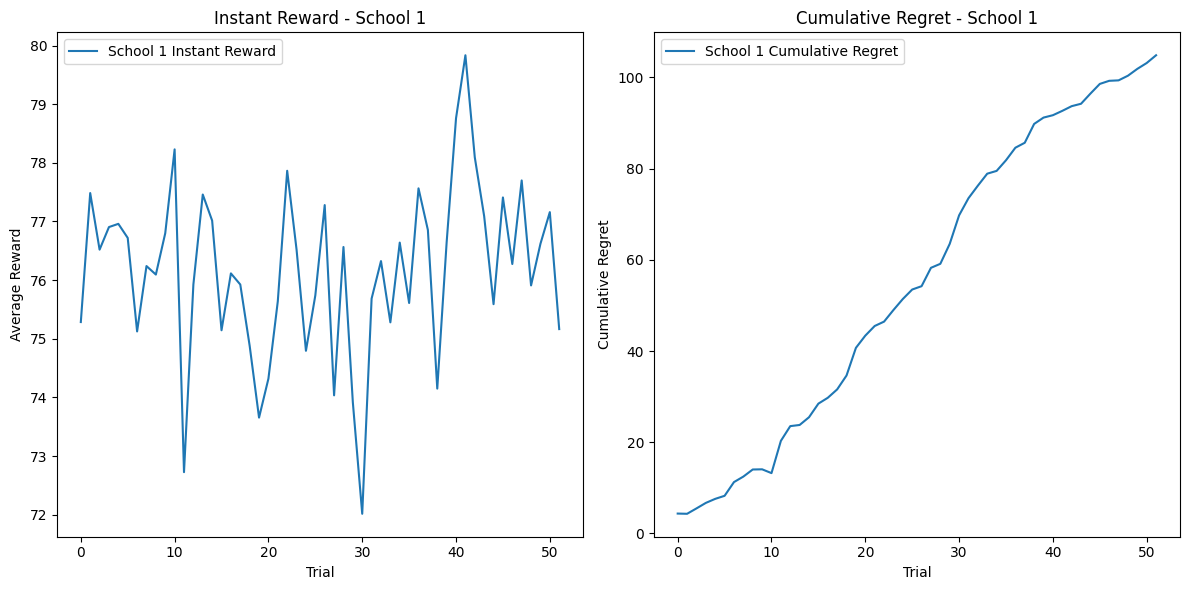

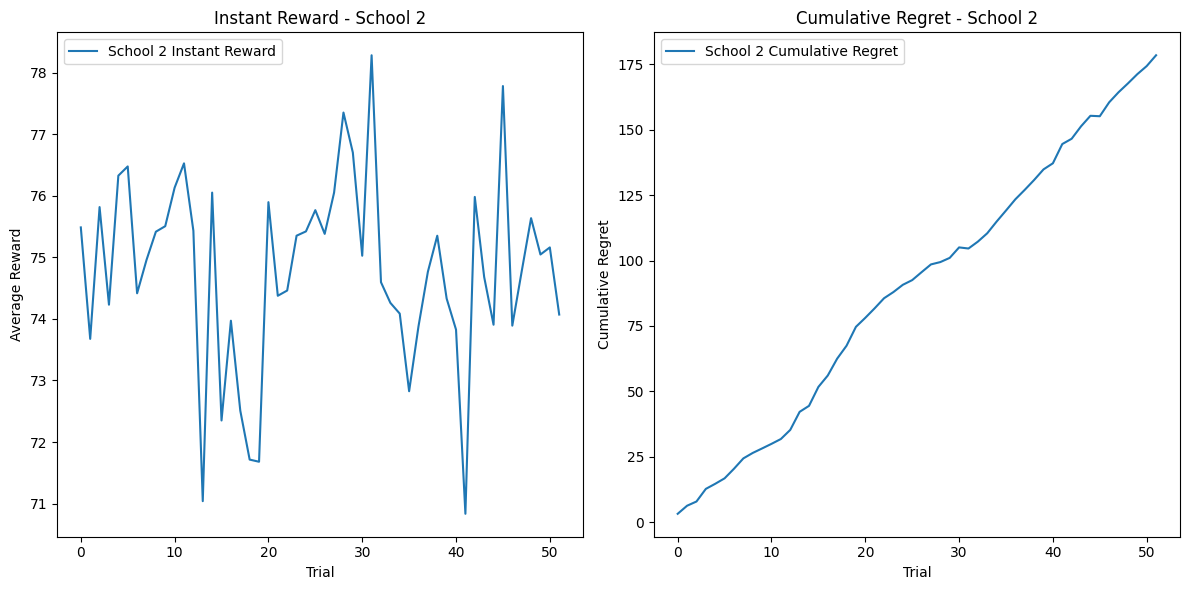

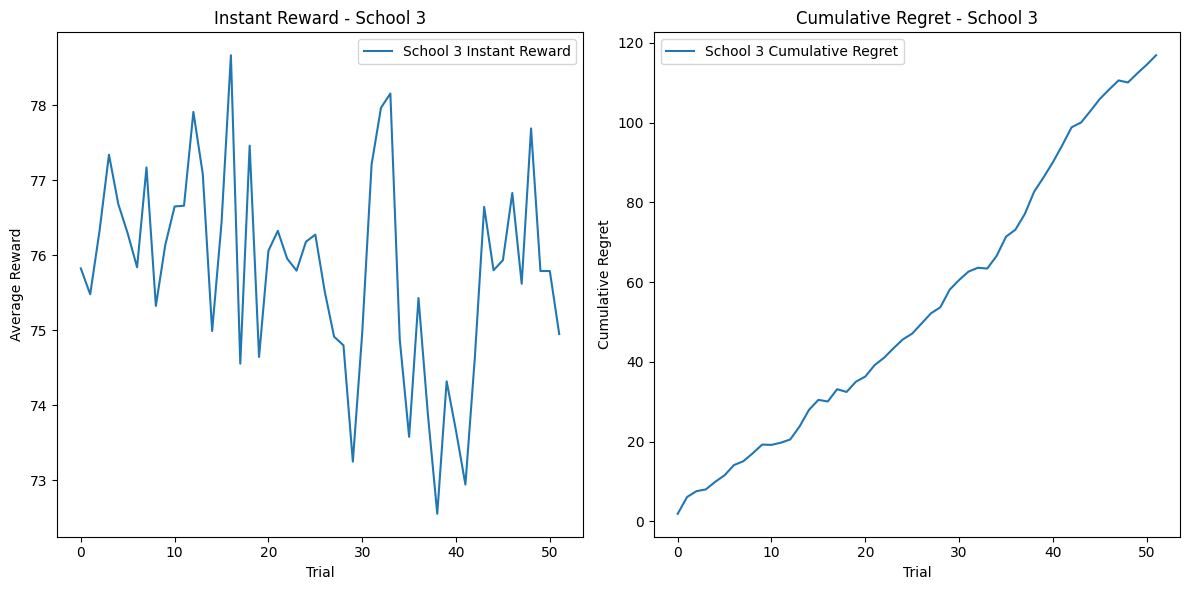

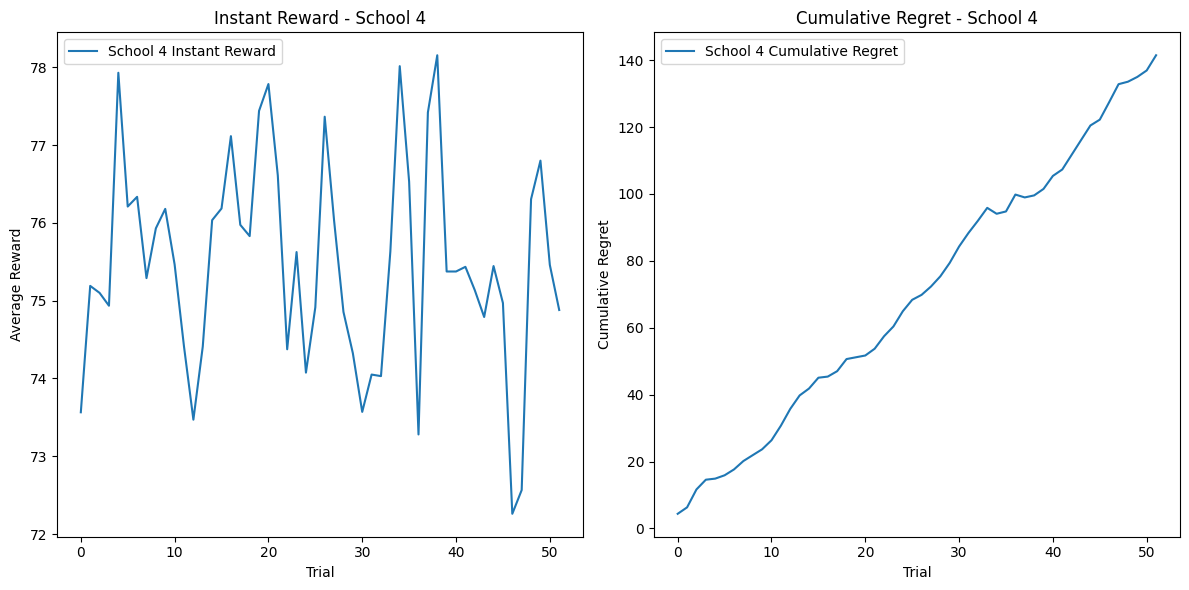

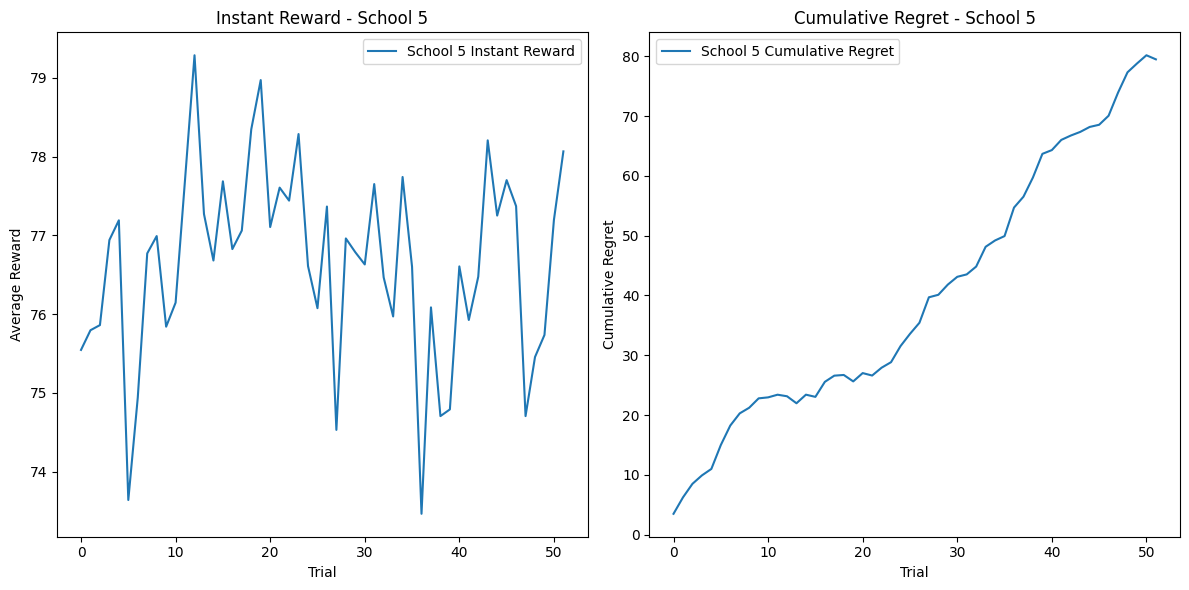

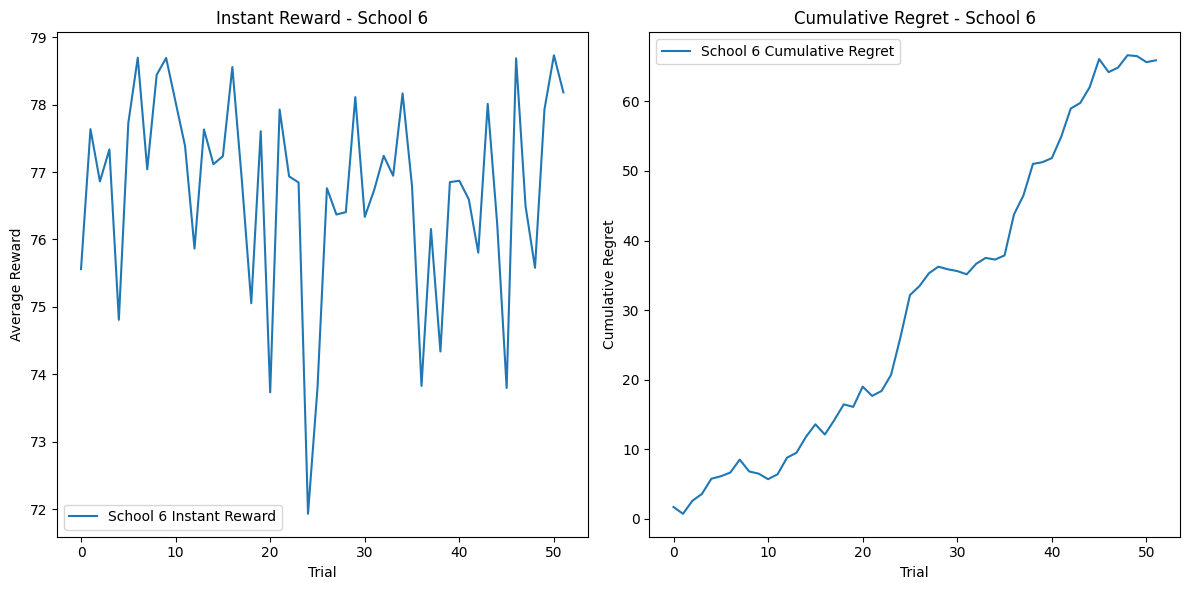

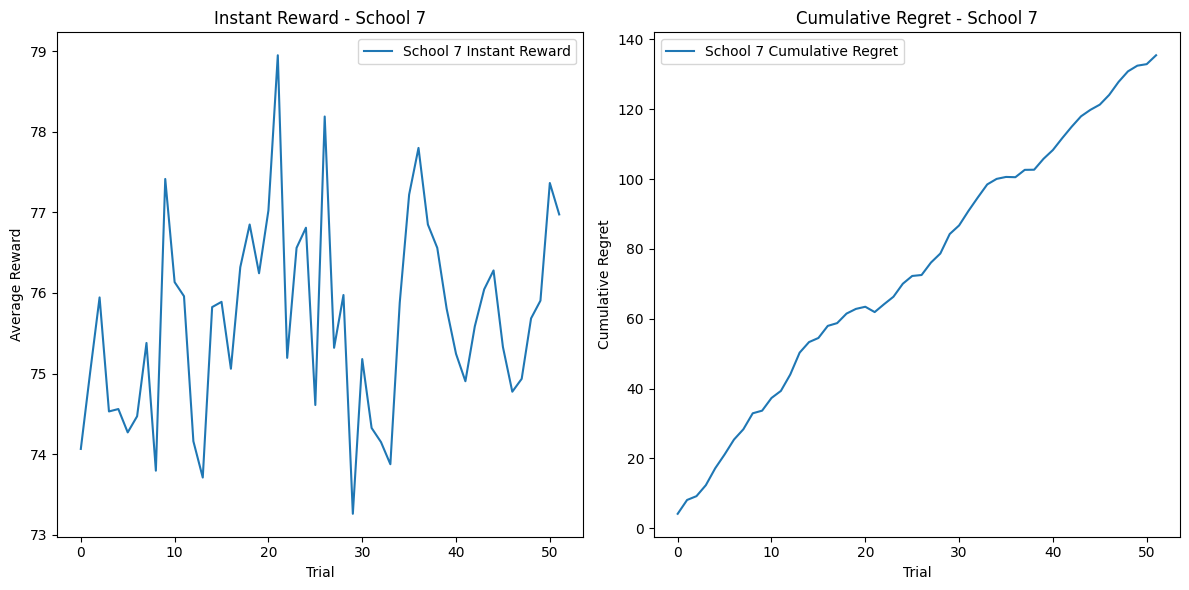

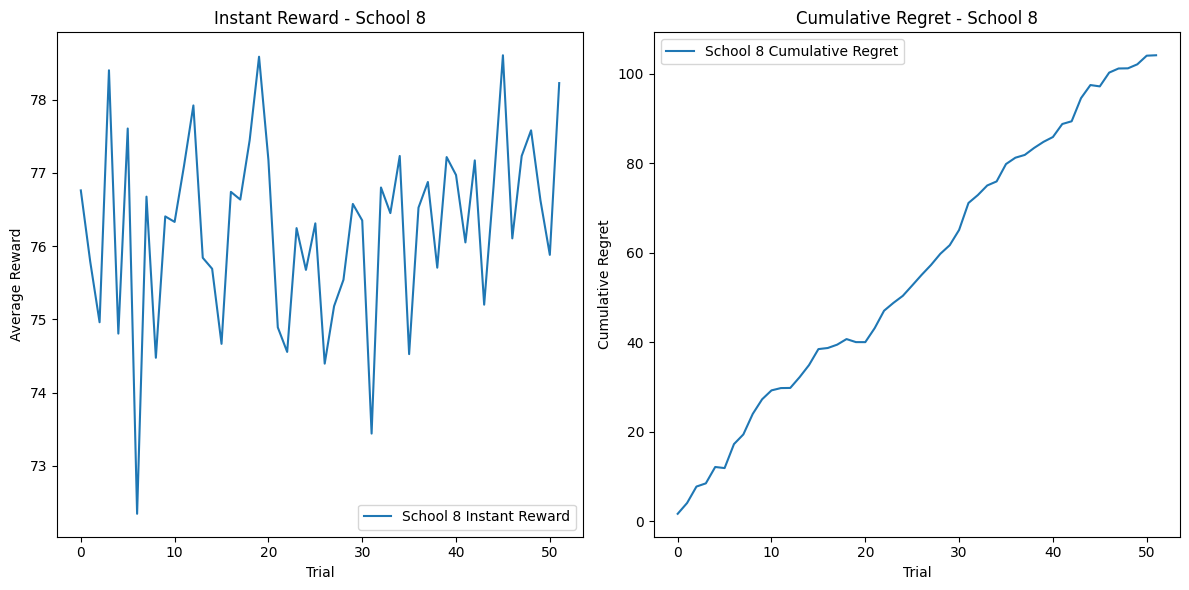

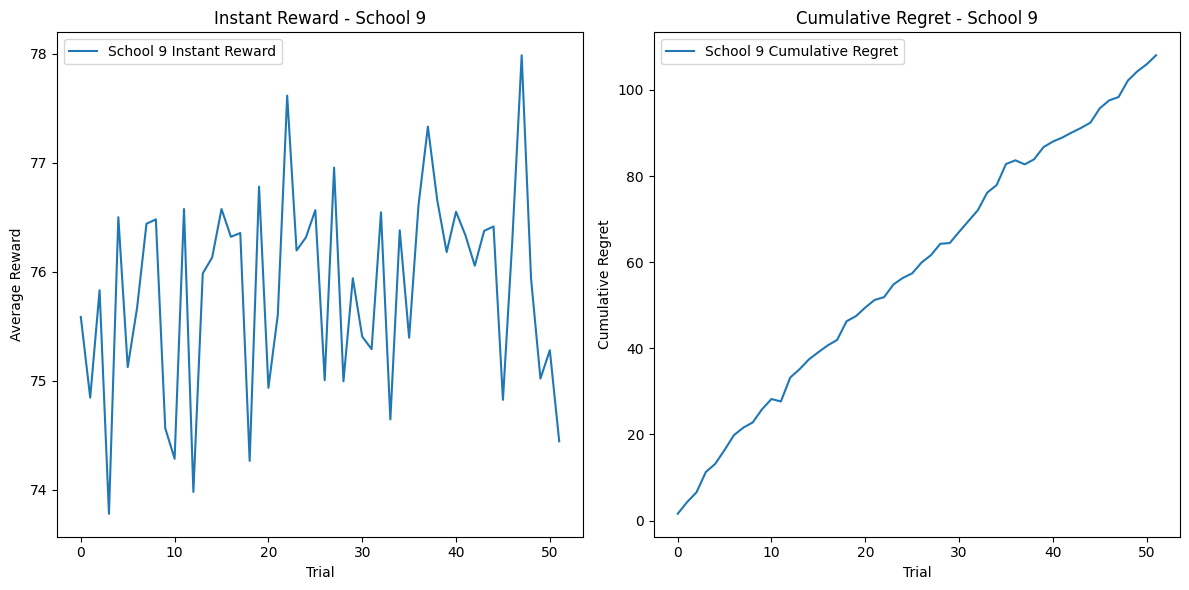

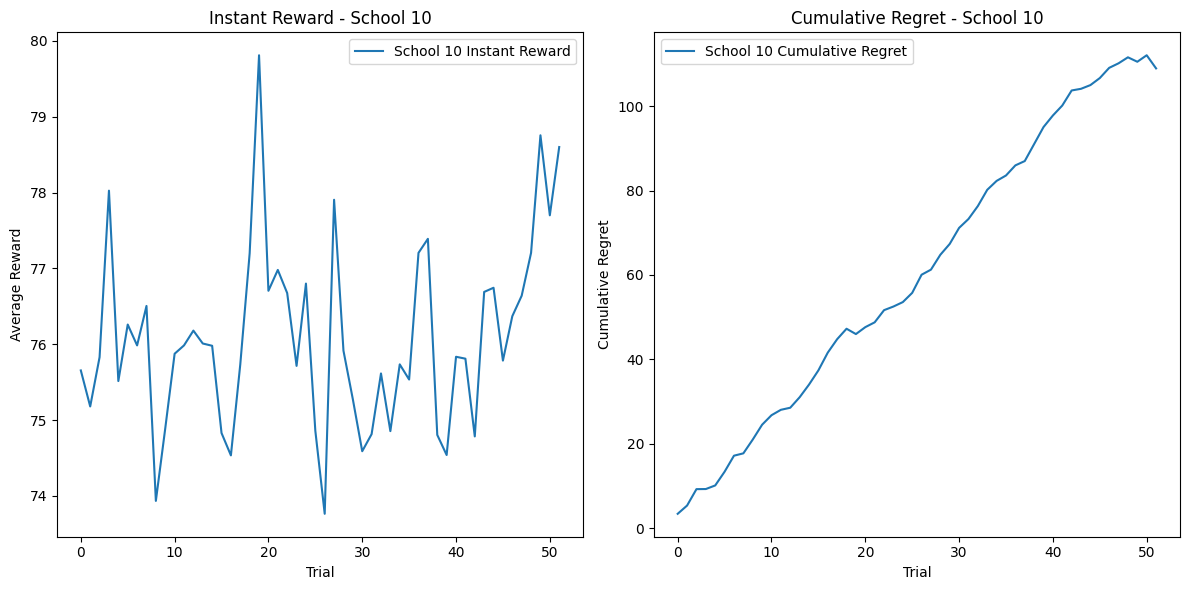

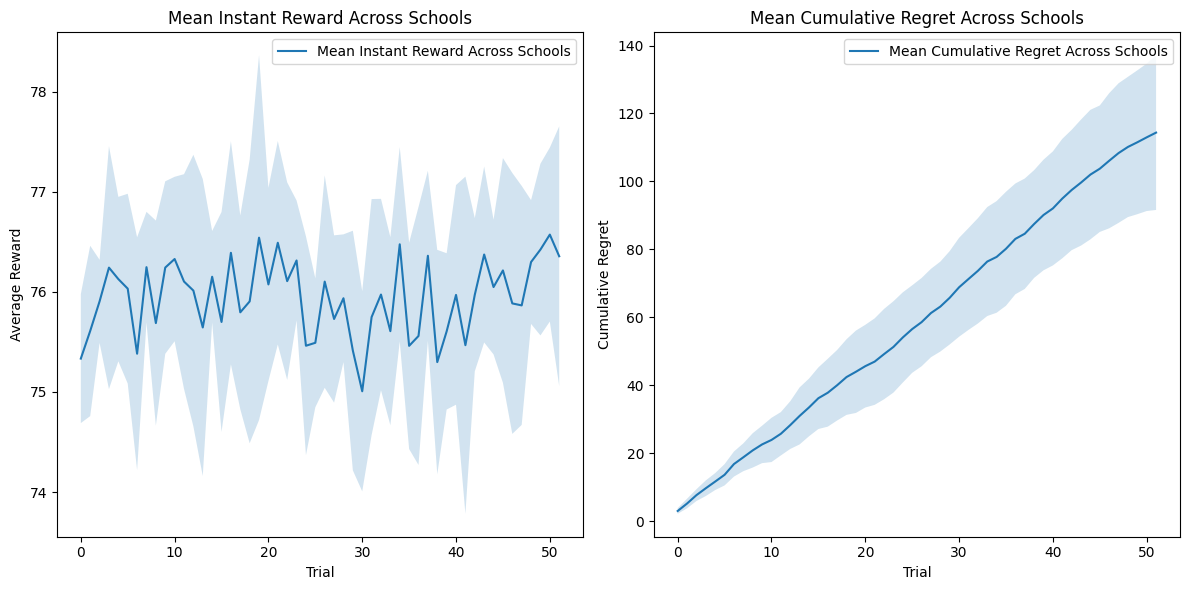

In [ ]:
# Plotting Cumulative Regret and Instant Reward for Each School
for school_id in range(num_schools):
    plt.figure(figsize=(12, 6))

    # Instant Reward
    plt.subplot(1, 2, 1)
    plt.plot(mean_rewards_per_trial[school_id], label=f"School {school_id + 1} Instant Reward")
    plt.title(f"Instant Reward - School {school_id + 1}")
    plt.xlabel("Trial")
    plt.ylabel("Average Reward")
    plt.legend()

    # Cumulative Regret
    plt.subplot(1, 2, 2)
    plt.plot(cumulative_regrets_per_trial[school_id], label=f"School {school_id + 1} Cumulative Regret")
    plt.title(f"Cumulative Regret - School {school_id + 1}")
    plt.xlabel("Trial")
    plt.ylabel("Cumulative Regret")
    plt.legend()

    plt.tight_layout()
    plt.show()




from scipy.stats import sem, t
from numpy import mean

# Calculate mean and 95% confidence interval across schools
mean_cumulative_regret = np.mean(cumulative_regrets_per_trial, axis=0)
mean_instant_reward = np.mean(mean_rewards_per_trial, axis=0)
std_err_regret = sem(cumulative_regrets_per_trial, axis=0)
std_err_reward = sem(mean_rewards_per_trial, axis=0)
h_regret = std_err_regret * t.ppf((1 + 0.95) / 2, num_schools - 1)
h_reward = std_err_reward * t.ppf((1 + 0.95) / 2, num_schools - 1)

# Plotting
plt.figure(figsize=(12, 6))

# Mean Instant Reward
plt.subplot(1, 2, 1)
plt.plot(mean_instant_reward, label='Mean Instant Reward Across Schools')
plt.fill_between(range(num_trials), mean_instant_reward - h_reward, mean_instant_reward + h_reward, alpha=0.2)
plt.title("Mean Instant Reward Across Schools")
plt.xlabel("Trial")
plt.ylabel("Average Reward")
plt.legend()

# Mean Cumulative Regret
plt.subplot(1, 2, 2)
plt.plot(mean_cumulative_regret, label='Mean Cumulative Regret Across Schools')
plt.fill_between(range(num_trials), mean_cumulative_regret - h_regret, mean_cumulative_regret + h_regret, alpha=0.2)
plt.title("Mean Cumulative Regret Across Schools")
plt.xlabel("Trial")
plt.ylabel("Cumulative Regret")
plt.legend()

plt.tight_layout()
plt.show()

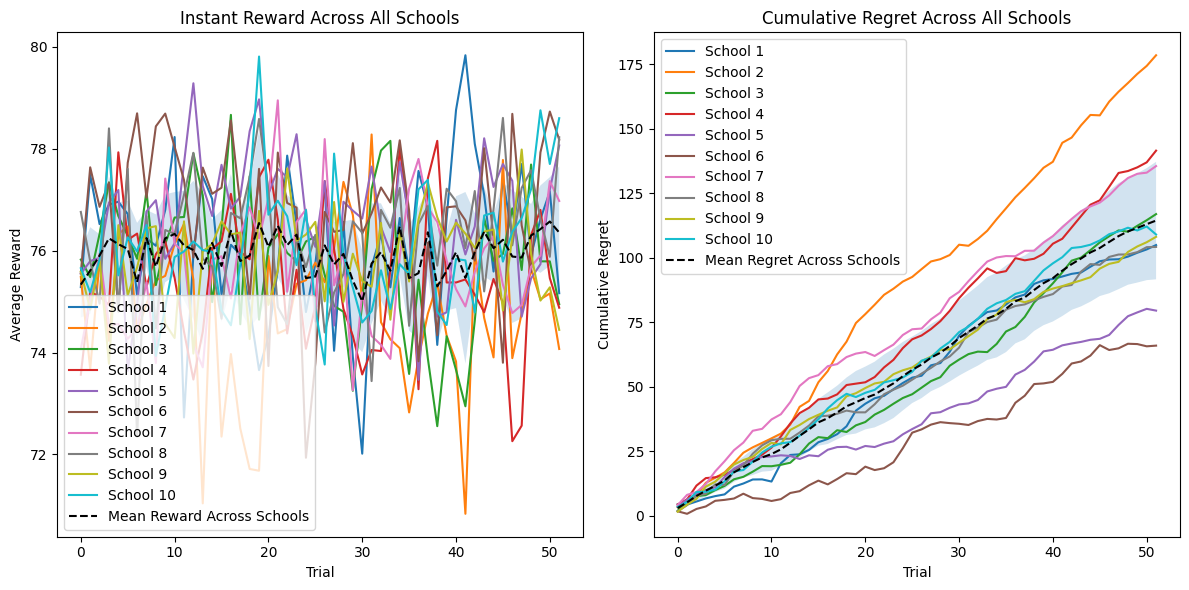

In [ ]:
# Plotting Cumulative Regret and Instant Reward for All Schools Together
plt.figure(figsize=(12, 6))

# Mean Instant Reward Across All Schools
plt.subplot(1, 2, 1)
for school_id in range(num_schools):
    plt.plot(mean_rewards_per_trial[school_id], label=f"School {school_id + 1}")
plt.plot(mean_instant_reward, label='Mean Reward Across Schools', color='black', linestyle='--')
plt.fill_between(range(num_trials), mean_instant_reward - h_reward, mean_instant_reward + h_reward, alpha=0.2)
plt.title("Instant Reward Across All Schools")
plt.xlabel("Trial")
plt.ylabel("Average Reward")
plt.legend()

# Mean Cumulative Regret Across All Schools
plt.subplot(1, 2, 2)
for school_id in range(num_schools):
    plt.plot(cumulative_regrets_per_trial[school_id], label=f"School {school_id + 1}")
plt.plot(mean_cumulative_regret, label='Mean Regret Across Schools', color='black', linestyle='--')
plt.fill_between(range(num_trials), mean_cumulative_regret - h_regret, mean_cumulative_regret + h_regret, alpha=0.2)
plt.title("Cumulative Regret Across All Schools")
plt.xlabel("Trial")
plt.ylabel("Cumulative Regret")
plt.legend()

plt.tight_layout()
plt.show()

## Epsilon Greedy Agent (Oracle: Random Forest)

In [ ]:
class ContextualEpsilonGreedyAgent:
    def __init__(self, learning_rate=0.01, no_arms=3, no_contexts=3, epsilon=0.1):
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.Q_values = np.zeros((no_contexts, no_arms))  # Q-values for each context and action
        self.rewards = np.zeros((no_contexts, no_arms))  # Rewards for each context and action
        self.action_counts = np.zeros((no_contexts, no_arms))  # Counts of each action for each context

    def get_action(self, context_id):
        if np.random.rand() < self.epsilon:
            return np.random.choice(len(self.Q_values[context_id]))
        else:
            return np.argmax(self.Q_values[context_id])

    def update(self, action, reward, context_id):
        self.action_counts[context_id][action] += 1
        self.rewards[context_id][action] += reward
        # Update Q-values using the average reward
        self.Q_values[context_id][action] = self.rewards[context_id][action] / self.action_counts[context_id][action]

# Environment
class Environment:
    def __init__(self, students):
        self.students = students

    def calc_reward(self, student_id, action, selected_type):   #taghir dadam injaro
        student = self.students[student_id]
        return student.get_reward(action, selected_type)

In [ ]:
# Initialize simulation parameters
no_arms = 3
no_contexts = 3
learning_rate = 0.01
epsilon = 0.1
num_trials = 52
students_per_school = 100
num_schools = 10

# Initialize structures to store mean rewards and cumulative regrets per trial for each school
mean_rewards_per_trial = np.zeros((num_schools, num_trials))
optimal_mean_rewards_per_trial = np.zeros((num_schools, num_trials))
cumulative_regrets_per_trial = np.zeros((num_schools, num_trials))



# Initial Data Collection for Online Learning
X, y = [], []
initial_data_size = 500

for _ in range(initial_data_size):
    student_type = np.random.randint(0, 3)
    student = Student_type1() if student_type == 0 else Student_type2() if student_type == 1 else Student_type3()
    action = np.random.choice(no_arms)
    reward = student.get_reward(action, student_type)
    if(reward>50):
        X.append(student.get_features())
        y.append(student_type)

X, y = shuffle(X, y)
classifier = RandomForestClassifier()
classifier.fit(X, y)


# Generate students and create environments for each school
schools_env = []
for school in range(num_schools):
    students_list = []
    students_type = np.random.randint(0, 3, students_per_school)
    for student in students_type:
        if student == 0:
            students_list.append(Student_type1())
        elif student == 1:
            students_list.append(Student_type2())
        else:
            students_list.append(Student_type3())
    schools_env.append(Environment(students_list))

In [ ]:
# Initialize agents for each school
agents = [ContextualEpsilonGreedyAgent(learning_rate, no_arms, no_contexts, epsilon) for _ in range(num_schools)]

# Simulation loop with online learning
for school_id in range(num_schools):
    new_X, new_y = [], []
    for trial in range(num_trials):
        trial_rewards = 0
        optimal_trial_rewards = 0
        #new_X, new_y = [], []

        for student_id in range(students_per_school):
            student = schools_env[school_id].students[student_id]
            predicted_context_id = classifier.predict([student.get_features()])[0]

            action = agents[school_id].get_action(predicted_context_id)
            reward = schools_env[school_id].calc_reward(student_id, action, predicted_context_id)
            optimal_reward = schools_env[school_id].students[student_id].get_optimal_reward()
            agents[school_id].update(action, reward, predicted_context_id)
            trial_rewards += reward
            optimal_trial_rewards +=optimal_reward

            # Collect new data for online learning
            if(reward>50):
                new_X.append(student.get_features())
                new_y.append(predicted_context_id)

        # Online update of the classifier
        if new_X:
            classifier.fit(new_X, new_y)

        # Update rewards and regrets
        mean_reward = trial_rewards / students_per_school
        optimal_mean_reward = optimal_trial_rewards /students_per_school
        mean_rewards_per_trial[school_id, trial] = mean_reward
        optimal_mean_rewards_per_trial[school_id, trial] = optimal_mean_reward
        #cumulative_regrets_per_trial[school_id, trial] = trial * 77.5 - np.sum(mean_rewards_per_trial[school_id, :trial + 1])
        cumulative_regrets_per_trial[school_id, trial] = np.sum(optimal_mean_rewards_per_trial[school_id, :trial + 1]) - np.sum(mean_rewards_per_trial[school_id, :trial + 1])

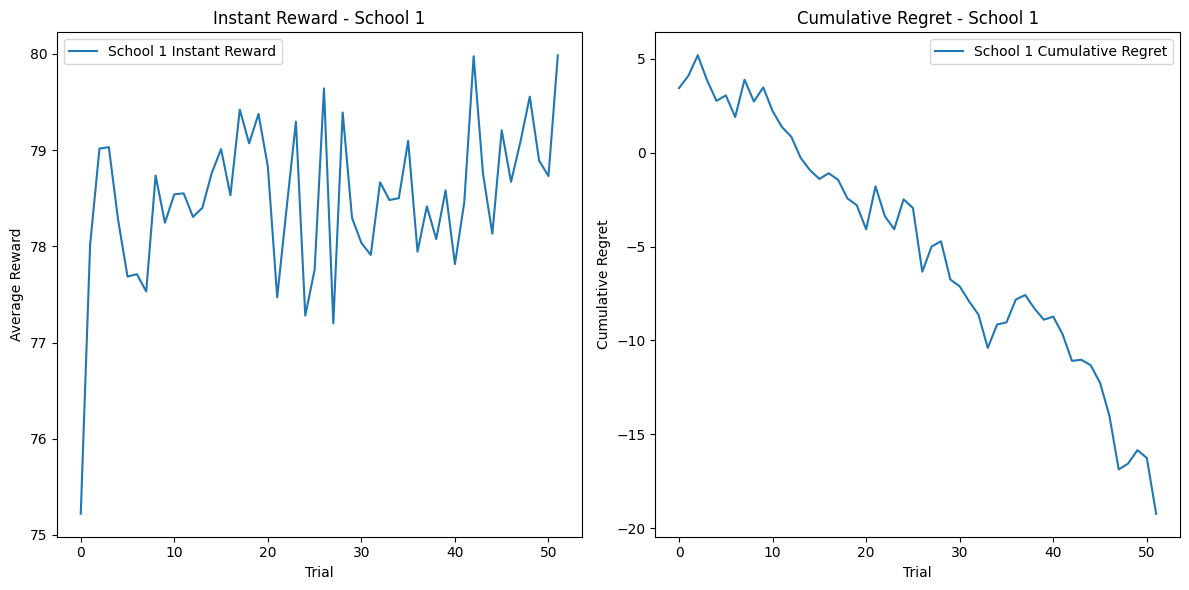

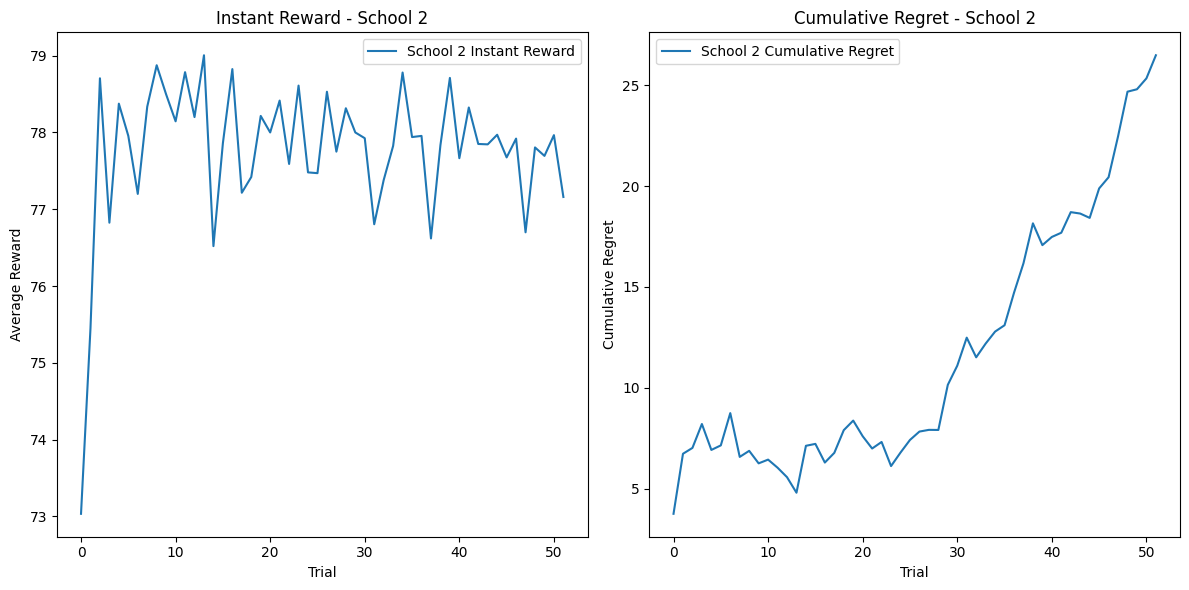

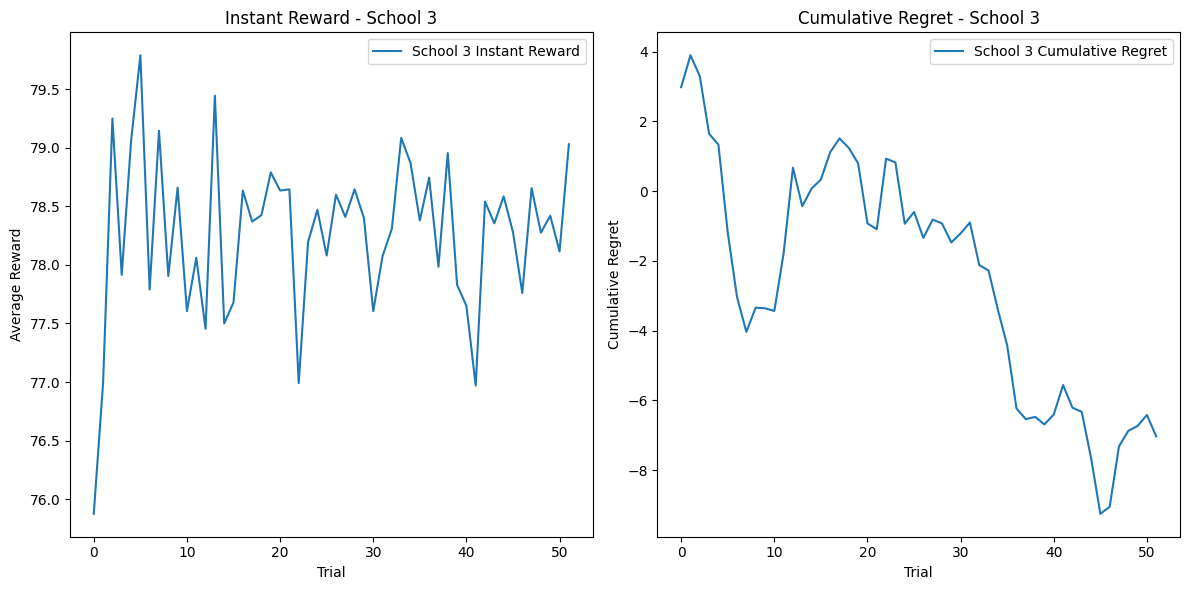

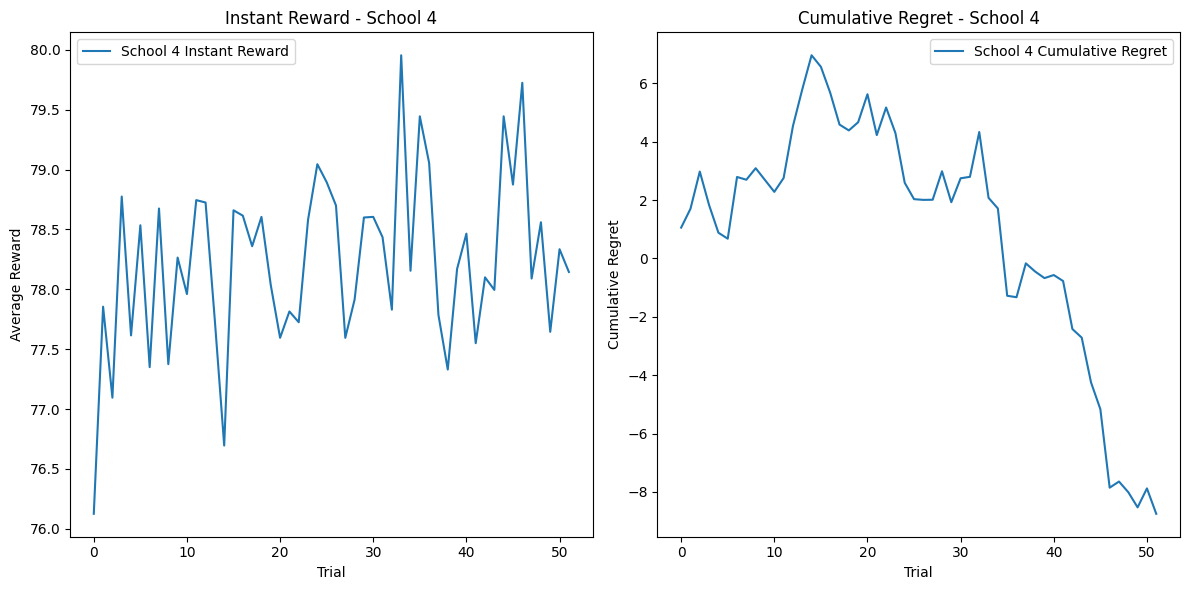

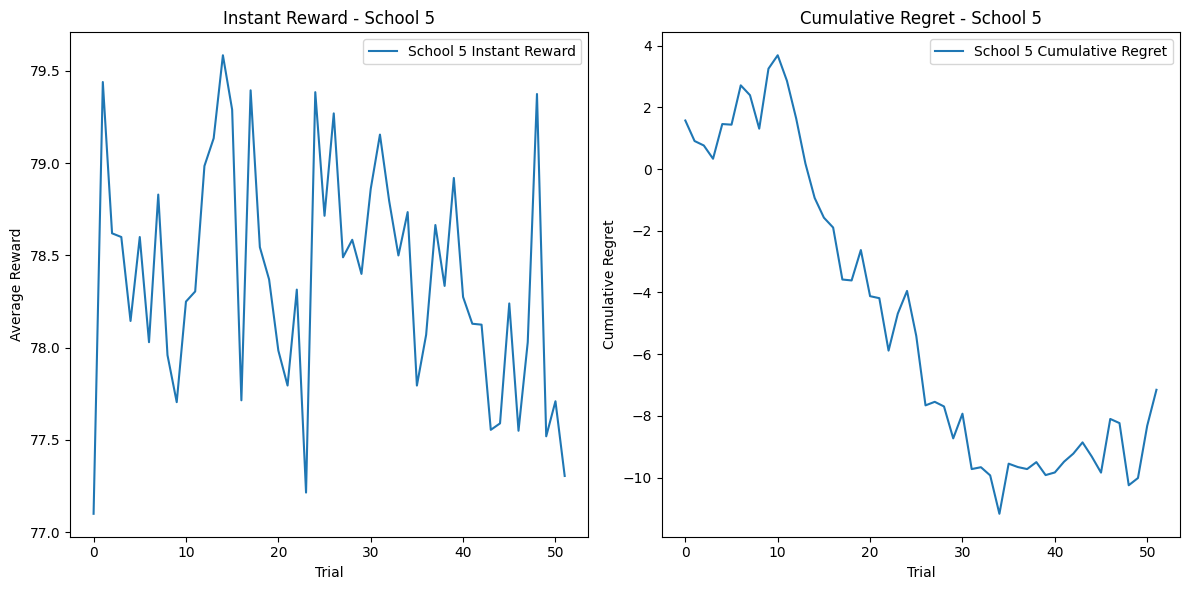

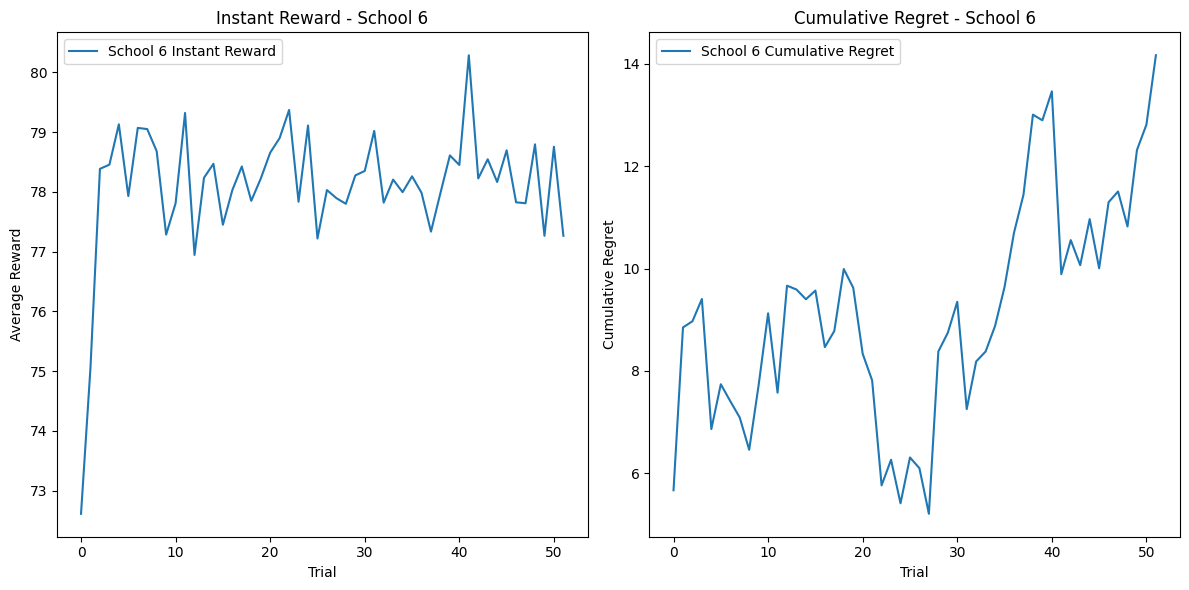

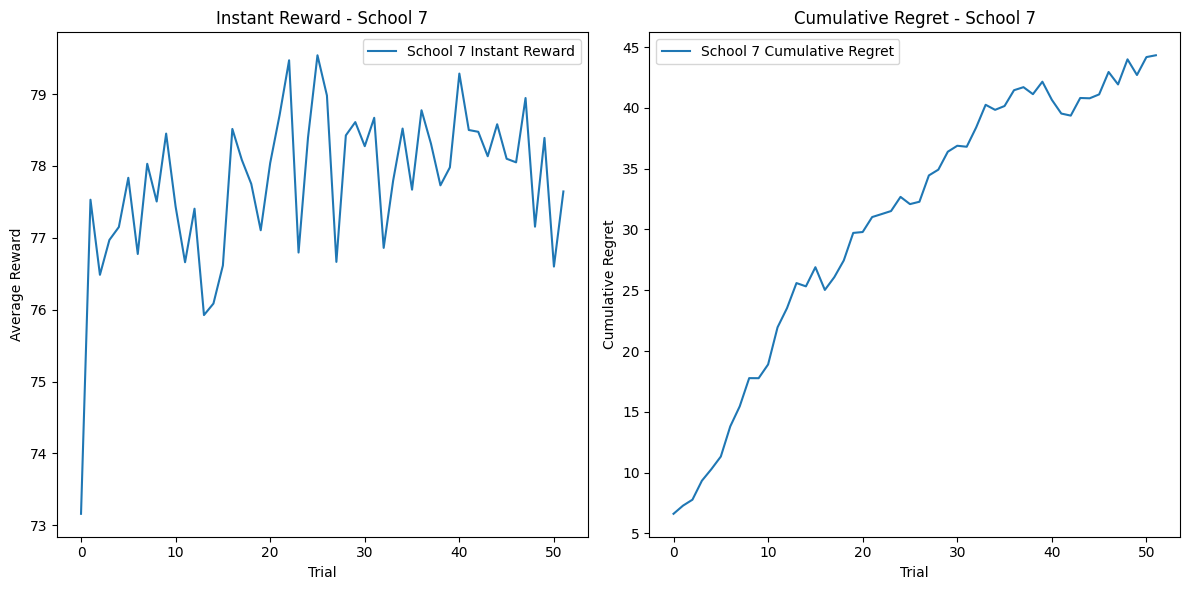

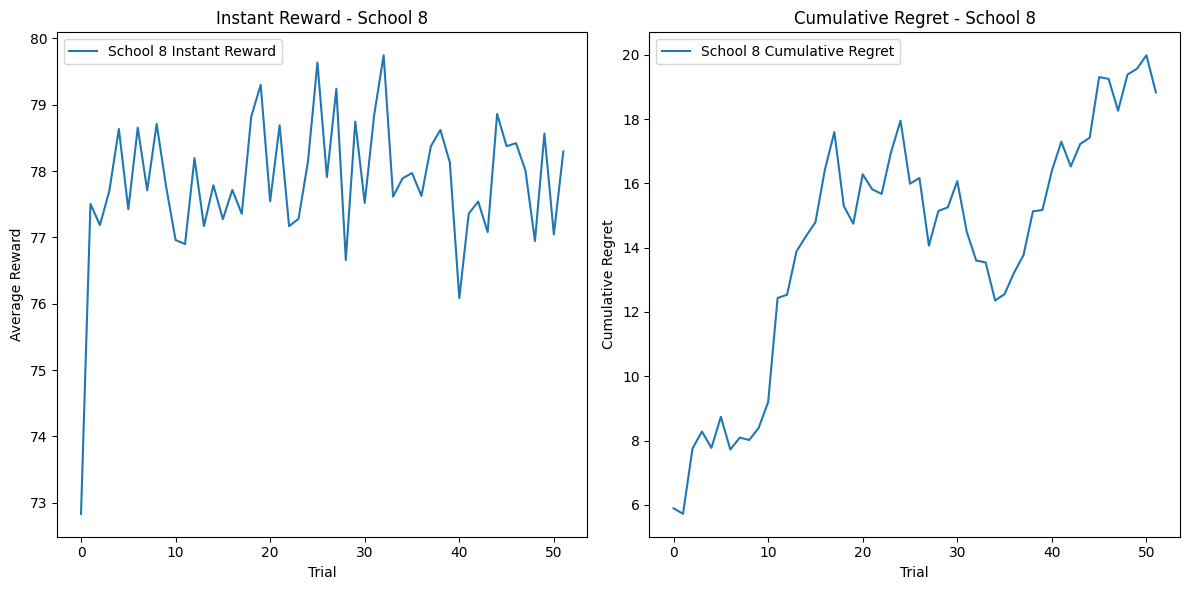

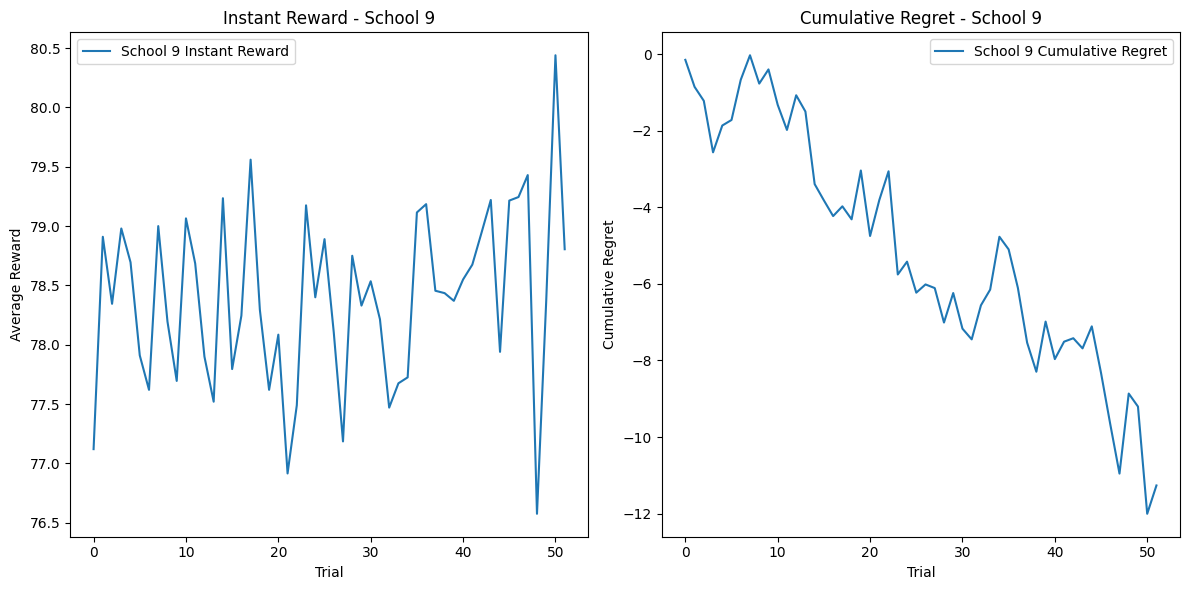

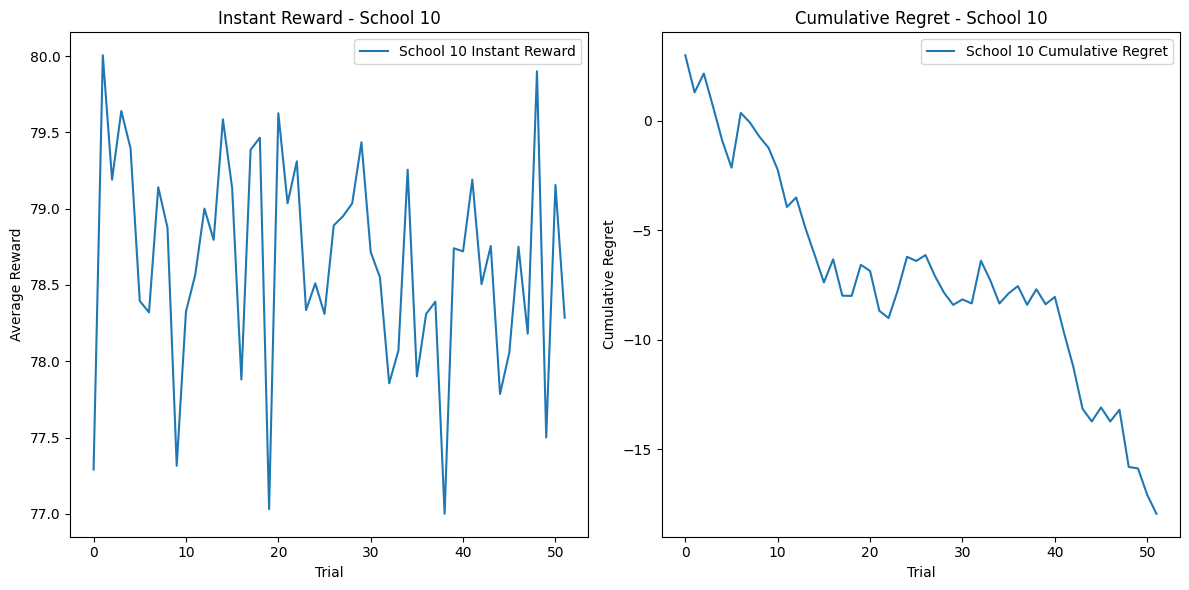

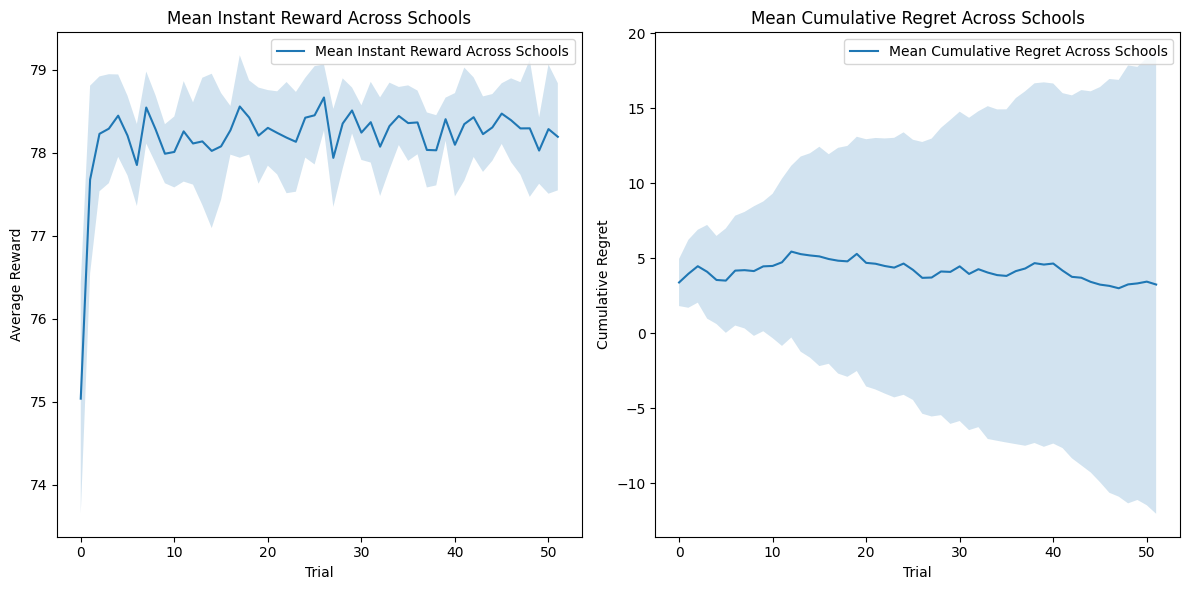

In [ ]:
# Plotting Cumulative Regret and Instant Reward for Each School
for school_id in range(num_schools):
    plt.figure(figsize=(12, 6))

    # Instant Reward
    plt.subplot(1, 2, 1)
    plt.plot(mean_rewards_per_trial[school_id], label=f"School {school_id + 1} Instant Reward")
    plt.title(f"Instant Reward - School {school_id + 1}")
    plt.xlabel("Trial")
    plt.ylabel("Average Reward")
    plt.legend()

    # Cumulative Regret
    plt.subplot(1, 2, 2)
    plt.plot(cumulative_regrets_per_trial[school_id], label=f"School {school_id + 1} Cumulative Regret")
    plt.title(f"Cumulative Regret - School {school_id + 1}")
    plt.xlabel("Trial")
    plt.ylabel("Cumulative Regret")
    plt.legend()

    plt.tight_layout()
    plt.show()




from scipy.stats import sem, t
from numpy import mean

# Calculate mean and 95% confidence interval across schools
mean_cumulative_regret = np.mean(cumulative_regrets_per_trial, axis=0)
mean_instant_reward = np.mean(mean_rewards_per_trial, axis=0)
std_err_regret = sem(cumulative_regrets_per_trial, axis=0)
std_err_reward = sem(mean_rewards_per_trial, axis=0)
h_regret = std_err_regret * t.ppf((1 + 0.95) / 2, num_schools - 1)
h_reward = std_err_reward * t.ppf((1 + 0.95) / 2, num_schools - 1)

# Plotting
plt.figure(figsize=(12, 6))

# Mean Instant Reward
plt.subplot(1, 2, 1)
plt.plot(mean_instant_reward, label='Mean Instant Reward Across Schools')
plt.fill_between(range(num_trials), mean_instant_reward - h_reward, mean_instant_reward + h_reward, alpha=0.2)
plt.title("Mean Instant Reward Across Schools")
plt.xlabel("Trial")
plt.ylabel("Average Reward")
plt.legend()

# Mean Cumulative Regret
plt.subplot(1, 2, 2)
plt.plot(mean_cumulative_regret, label='Mean Cumulative Regret Across Schools')
plt.fill_between(range(num_trials), mean_cumulative_regret - h_regret, mean_cumulative_regret + h_regret, alpha=0.2)
plt.title("Mean Cumulative Regret Across Schools")
plt.xlabel("Trial")
plt.ylabel("Cumulative Regret")
plt.legend()

plt.tight_layout()
plt.show()


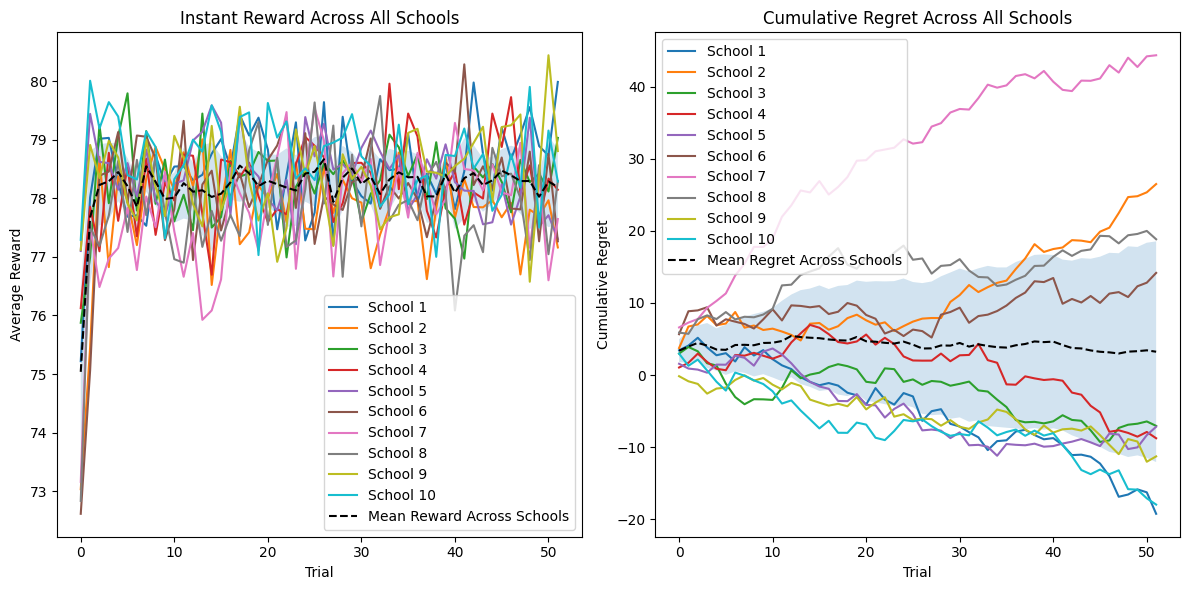

In [ ]:
# Plotting Cumulative Regret and Instant Reward for All Schools Together
plt.figure(figsize=(12, 6))

# Mean Instant Reward Across All Schools
plt.subplot(1, 2, 1)
for school_id in range(num_schools):
    plt.plot(mean_rewards_per_trial[school_id], label=f"School {school_id + 1}")
plt.plot(mean_instant_reward, label='Mean Reward Across Schools', color='black', linestyle='--')
plt.fill_between(range(num_trials), mean_instant_reward - h_reward, mean_instant_reward + h_reward, alpha=0.2)
plt.title("Instant Reward Across All Schools")
plt.xlabel("Trial")
plt.ylabel("Average Reward")
plt.legend()

# Mean Cumulative Regret Across All Schools
plt.subplot(1, 2, 2)
for school_id in range(num_schools):
    plt.plot(cumulative_regrets_per_trial[school_id], label=f"School {school_id + 1}")
plt.plot(mean_cumulative_regret, label='Mean Regret Across Schools', color='black', linestyle='--')
plt.fill_between(range(num_trials), mean_cumulative_regret - h_regret, mean_cumulative_regret + h_regret, alpha=0.2)
plt.title("Cumulative Regret Across All Schools")
plt.xlabel("Trial")
plt.ylabel("Cumulative Regret")
plt.legend()

plt.tight_layout()
plt.show()